In [51]:
""" Import libraries """

import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import cartopy
import cmocean
import os

In [52]:
# set the path to the input data file
input_file = "/N/project/easg690_fall2025/data/ERA5/ds633.0/e5.oper.an.sfc/202106/e5.oper.an.sfc.128_136_tcw.ll025sc.2021060100_2021063023.nc"

# set the directory where we'll save the images
output_dir = "./animation_frames"

# set the timestep to plot
i = 0

# make sure the output directory exists
os.makedirs(output_dir, exist_ok=True)

# load the data file
ds_in = xr.open_dataset(input_file, chunks = -1)
ds_in

<xarray.Dataset> Size: 3GB
Dimensions:    (time: 720, latitude: 721, longitude: 1440)
Coordinates:
  * latitude   (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float64 12kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * time       (time) datetime64[ns] 6kB 2021-06-01 ... 2021-06-30T23:00:00
Data variables:
    TCW        (time, latitude, longitude) float32 3GB dask.array<chunksize=(720, 721, 1440), meta=np.ndarray>
    utc_date   (time) int32 3kB dask.array<chunksize=(720,), meta=np.ndarray>
Attributes:
    DATA_SOURCE:          ECMWF: https://cds.climate.copernicus.eu, Copernicu...
    NETCDF_CONVERSION:    CISL RDA: Conversion from ECMWF GRIB1 data to netCDF4.
    NETCDF_VERSION:       4.7.4
    CONVERSION_PLATFORM:  Linux r4i1n35 4.12.14-95.51-default #1 SMP Fri Apr ...
    CONVERSION_DATE:      Fri Sep  3 11:04:41 MDT 2021
    Conventions:          CF-1.6
    NETCDF_COMPRESSION:   NCO: Precision-preserving compression to netCDF4/HD...
    history:              Fri Sep  3 11:04:57 2021: ncks -4 --ppc default=7 e...
    NCO:                  netCDF Operators version 4.9.5 (Homepage = http://n...

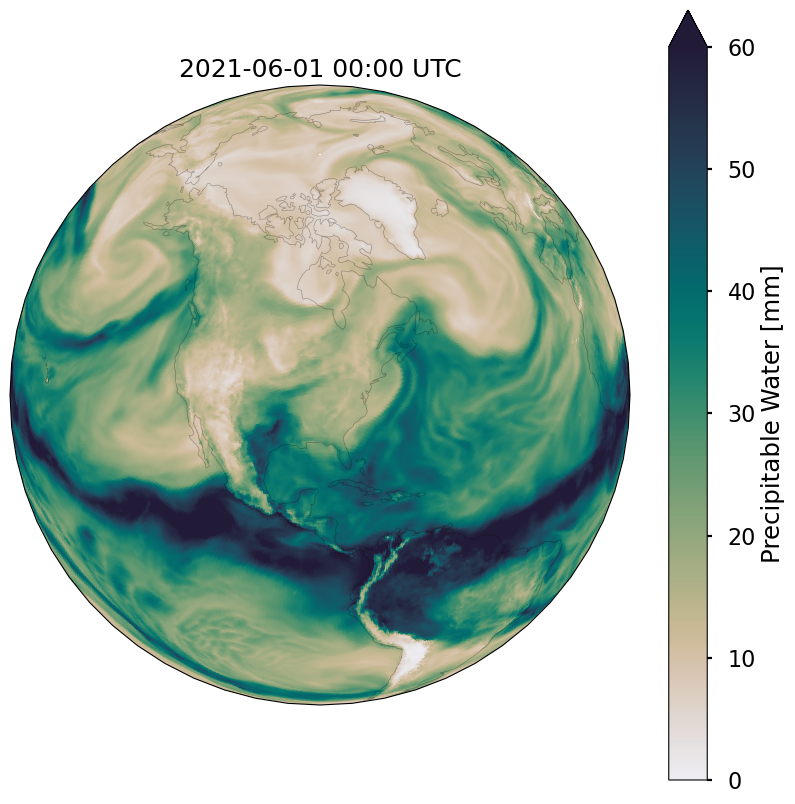

In [53]:
# get the variable at the requested timestep
tcw = ds_in['TCW'].isel(time=i)

# plot the variable on an orthographic projection centered on Bloomington, IN
clat = 39.1653
clon = -86.5264
projection = cartopy.crs.Orthographic(clon, clat)
fig, ax = plt.subplots(figsize=(10,10), subplot_kw=dict(projection=projection))

# plot the data
tcw.plot(
    ax=ax, 
    transform = cartopy.crs.PlateCarree(),
    cmap = cmocean.cm.rain,
    cbar_kwargs = dict(label = f'Precipitable Water [mm]'),
    vmin = 0, 
    vmax = 60, 
)

# get the time of the timestep
time = tcw.time.values

# convert it to a datetime object
time = pd.to_datetime(time)

# add a tittle with a nicely formatted date
ax.set_title(time.strftime("%Y-%m-%d %H:%M UTC"), fontsize=18)

# add coastlines
ax.coastlines(alpha = 0.3)

# save the plot
output_file = os.path.join(output_dir, f"tcw_{i:05d}.png")
fig.savefig(output_file, dpi=300, bbox_inches="tight")

plt.show()

In [58]:
""" Make a function to plot and save the data at a given timestep. """

def generate_frame(
        i : int,
        input_file = "/N/project/easg690_fall2025/data/ERA5/ds633.0/e5.oper.an.sfc/202106/e5.oper.an.sfc.128_136_tcw.ll025sc.2021060100_2021063023.nc",
        output_dir = "./animation_frames/"):

        # prevent matplotlib from displaying the plot
        plt.ioff()

        # make sure the output directory exists
        os.makedirs(output_dir, exist_ok=True)

        # load the data file 
        ds_in = xr.open_dataset(input_file, chunks = -1)

        # get the variable at the requested timestep
        tcw = ds_in['TCW'].isel(time=i)

        # plot the variable on an orthographic projection centered on Bloomington, IN
        clat = 39.1653
        clon = -86.5264
        projection = cartopy.crs.Orthographic(clon, clat)
        fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection=projection))

        # plot the data
        tcw.plot(
        ax = ax,
        transform = cartopy.crs.PlateCarree(),
        cmap = cmocean.cm.rain,
        cbar_kwargs = dict(label = f'Precipitable Water [mm]'),
        vmin = 0,
        vmax = 60,
        )

        # get the time of the timestep
        time = tcw.time.values

        # convert it to a datetime object
        time = pd.to_datetime(time)

        # add a title with a nicely formatted date
        ax.set_title(time.strftime("%Y-%m-%d %H:%M UTC"), fontsize=18)

        # add coastlines
        ax.coastlines(alpha = 0.3)

        # save the plot
        output_file = os.path.join(output_dir, f"tcw_{i:05d}.png")
        # save the plot
        fig.savefig(output_file, dpi=300, bbox_inches="tight")

        # close the figure
        plt.close(fig)

        return output_file

In [59]:
""" Test the function. """

# set the timestep to plot (select a new timestep)
i = 1

# generate the plot
generate_frame(i)

'./animation_frames/tcw_00001.png'